# 实例1：图像的手绘效果

## 一：图像的数组表示

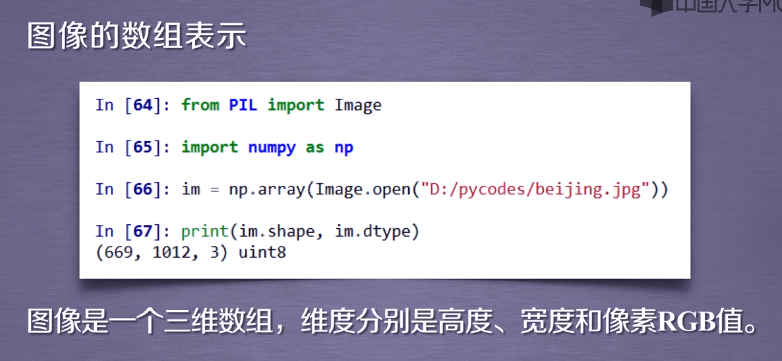

## 二：图像的变换

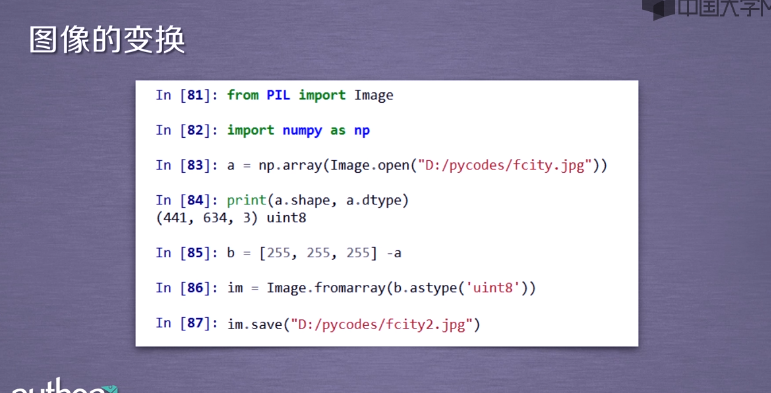

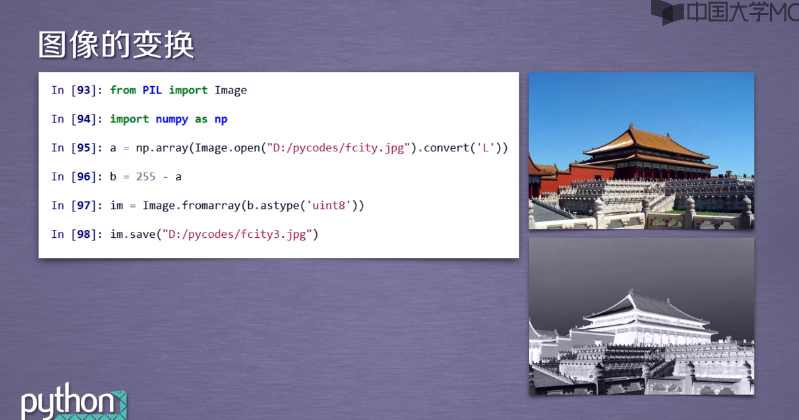

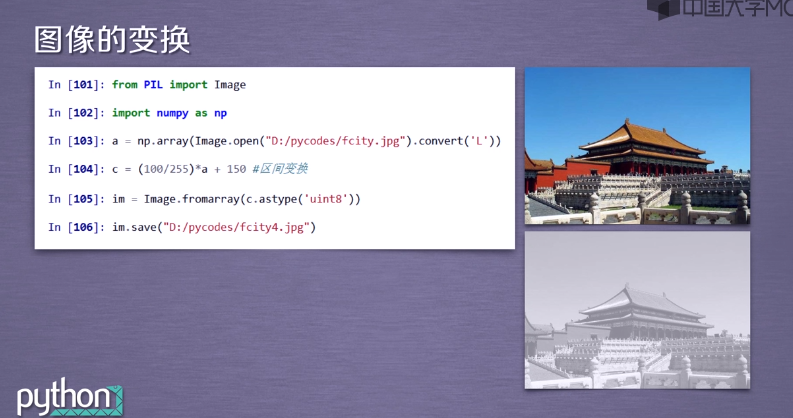

## 三：“图像的手绘效果”实例分析

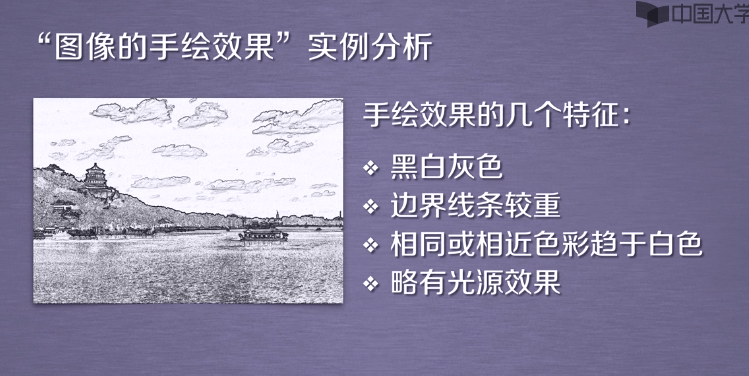

## 四：实际操作

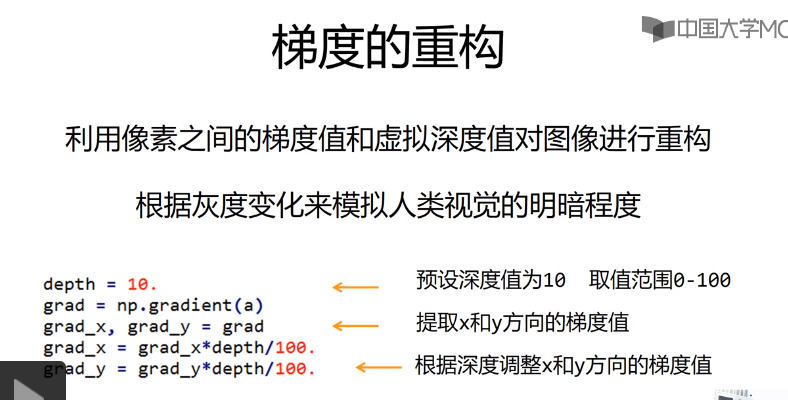

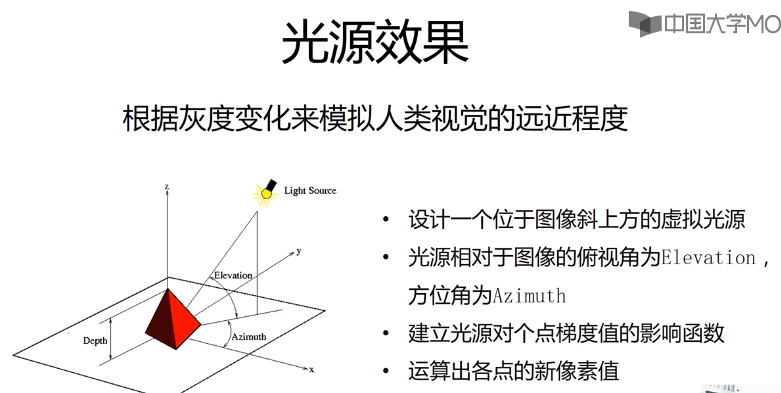

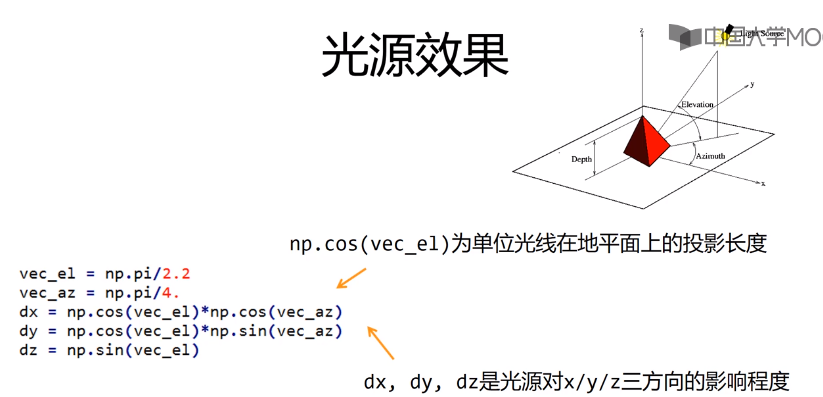

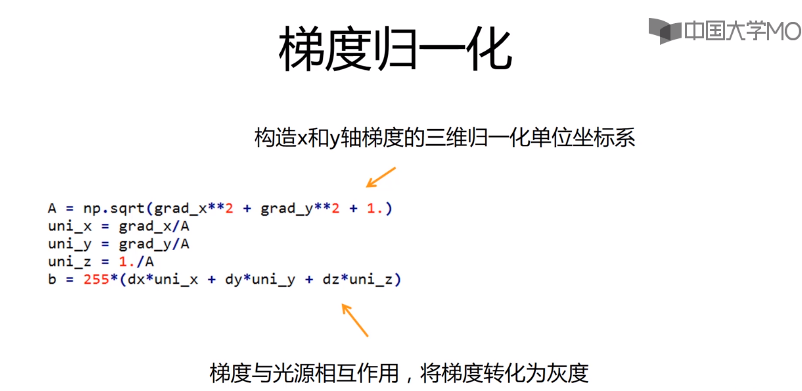

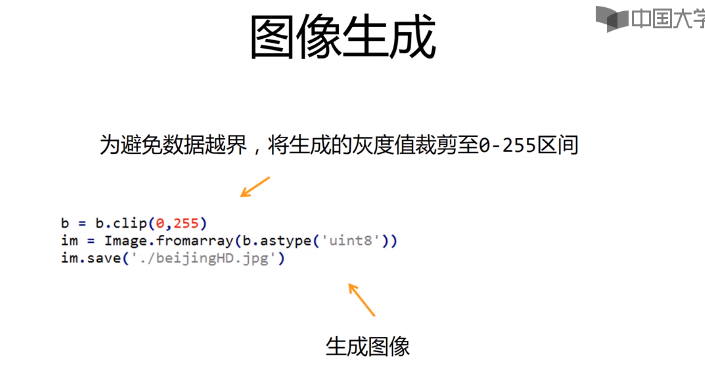

In [1]:
from PIL import Image
import numpy as np
 
a = np.asarray(Image.open(r'C:\Users\Fire\Desktop\test.jpg').convert('L')).astype('float')
 
depth = 10.                      # (0-100)
grad = np.gradient(a)             #取图像灰度的梯度值
grad_x, grad_y = grad               #分别取横纵图像梯度值
grad_x = grad_x*depth/100.
grad_y = grad_y*depth/100.
A = np.sqrt(grad_x**2 + grad_y**2 + 1.)
uni_x = grad_x/A
uni_y = grad_y/A
uni_z = 1./A
 
vec_el = np.pi/2.2                   # 光源的俯视角度，弧度值
vec_az = np.pi/4.                    # 光源的方位角度，弧度值
dx = np.cos(vec_el)*np.cos(vec_az)   #光源对x 轴的影响
dy = np.cos(vec_el)*np.sin(vec_az)   #光源对y 轴的影响
dz = np.sin(vec_el)              #光源对z 轴的影响
 
b = 255*(dx*uni_x + dy*uni_y + dz*uni_z)     #光源归一化
b = b.clip(0,255)
 
im = Image.fromarray(b.astype('uint8'))  #重构图像
im.save(r'C:\Users\Fire\Desktop\1.jpg')